<a href="https://colab.research.google.com/github/mixa15341/Deep_Learning/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%969/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%969_%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_YOLOv9_%D0%B4%D0%BB%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87_%D0%B4%D0%B5%D1%82%D0%B5%D0%BA%D1%86%D0%B8%D0%B8_%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №9. Использование модели YOLOv9 для решение задач детекции и классификации

*Примечание:* для каждого задания, в конечном итоге, необходимо сформировать обученную модель и задеплоить её на сервисе **RoboFlow**



## Задание 1. Найдите готовый датасет для детекции объектов и обучите на нем модель YOLOv9:

- Для удобства работы с датасетом и деплоя модели используйте сервис [RoboFlow](https://roboflow.com/)

In [1]:
!nvidia-smi

Wed May 29 01:03:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 9.91 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 54.8 MB/s eta 0:00:00


In [4]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 758.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00


In [5]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [6]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 May 29 01:08 .
drwxr-xr-x 1 root root      4096 May 29 01:08 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


In [7]:
%cd {HOME}/yolov9

/content/yolov9


In [8]:
# Импортируем библиотеку roboflow
import roboflow

# Входим в систему roboflow. Для этого вам потребуется ввести свои учетные данные.
roboflow.login()

# Создаем экземпляр класса Roboflow
rf = roboflow.Roboflow()

# Получаем доступ к проекту в рабочем пространстве.
# Здесь "alexandre-b2d69" - это имя рабочего пространства, а "first-ugfem" - имя проекта.

project = rf.workspace("colab-ayqkm").project("brain-tumors-rk3xc")

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...


In [9]:
project.list_versions()

[{'id': 'colab-ayqkm/brain-tumors-rk3xc/1', 'name': '2024-05-14 12:37am', 'created': 1715618253.424, 'images': 146, 'splits': {'valid': 29, 'test': 14, 'train': 103}, 'model': {'id': 'brain-tumors-rk3xc/1', 'endpoint': 'https://detect.roboflow.com/brain-tumors-rk3xc/1', 'start': 1715627214.303, 'end': 1715627214.303, 'fromScratch': True, 'tfjs': False, 'oak': False, 'map': '89.01', 'recall': '84.38', 'precision': '90.74'}, 'preprocessing': {'auto-orient': True, 'resize': {'format': 'Stretch to', 'width': 640, 'height': 640}}, 'augmentation': {}, 'exports': ['coco', 'yolov5pytorch', 'yolov9']}]


In [10]:
version = project.version(1)

dataset = version.download("yolov9")


Extracting Dataset Version Zip to brain-tumors-1 in yolov9:: 100%|██████████| 304/304 [00:00<00:00, 5348.19it/s]


In [11]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-05-29 01:09:08.348587: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 01:09:08.348649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 01:09:08.350270: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-29 01:09:08.358218: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 01:09:09.539649: W tensorf

In [12]:
!ls {HOME}/yolov9/runs/train/exp/


confusion_matrix.png				    opt.yaml	  train_batch0.jpg
events.out.tfevents.1716944950.03e8d064cfed.1862.0  P_curve.png   train_batch1.jpg
F1_curve.png					    PR_curve.png  train_batch2.jpg
hyp.yaml					    R_curve.png   val_batch0_labels.jpg
labels_correlogram.jpg				    results.csv   val_batch0_pred.jpg
labels.jpg					    results.png   weights


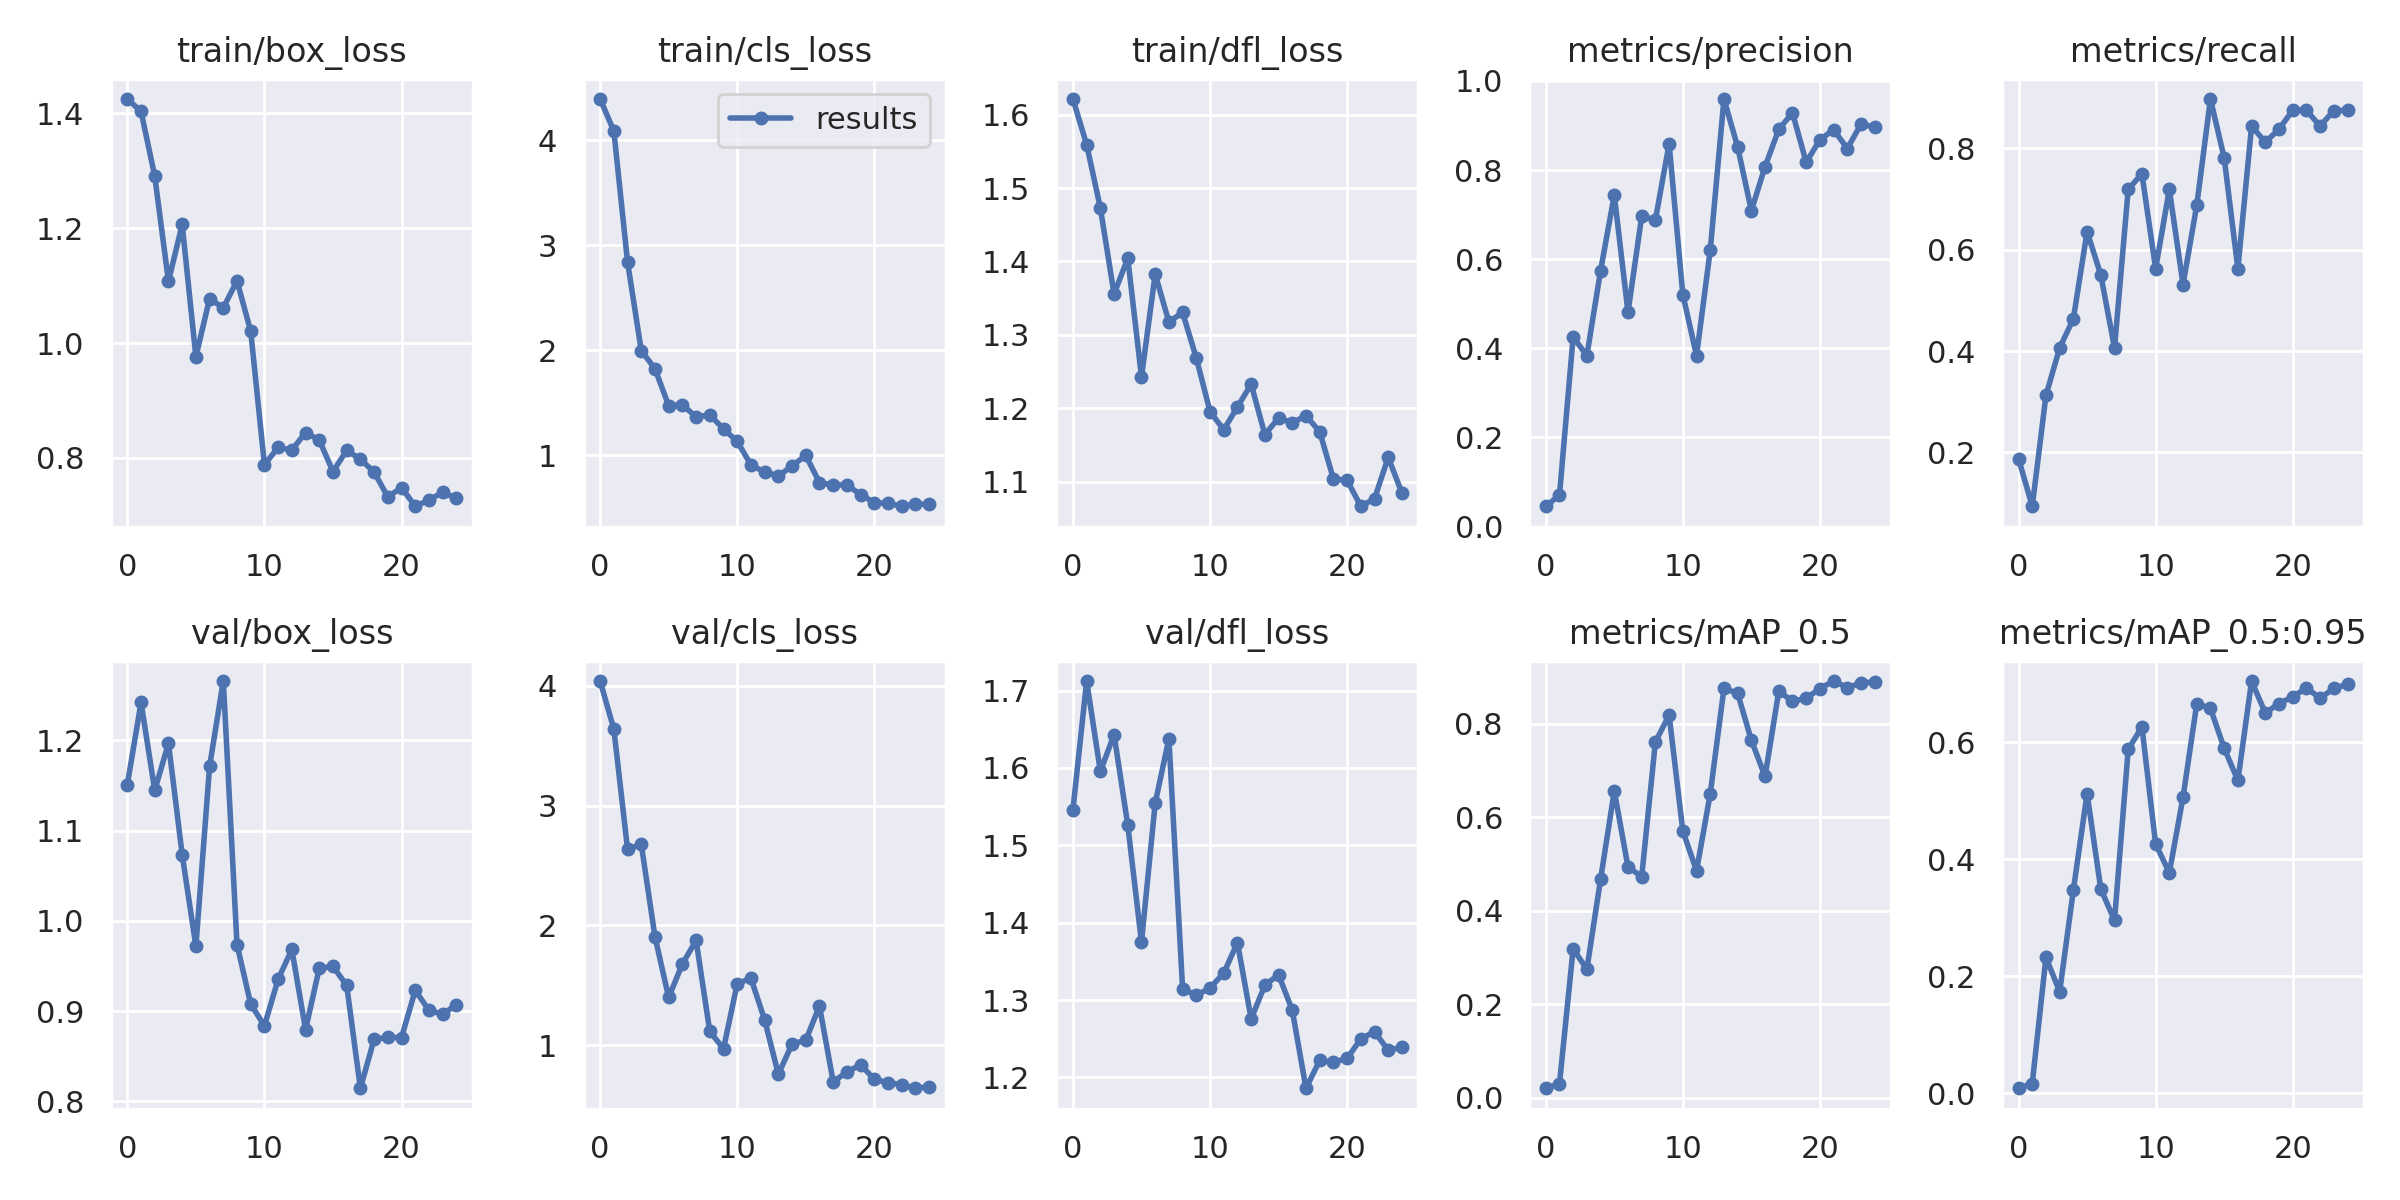

In [13]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

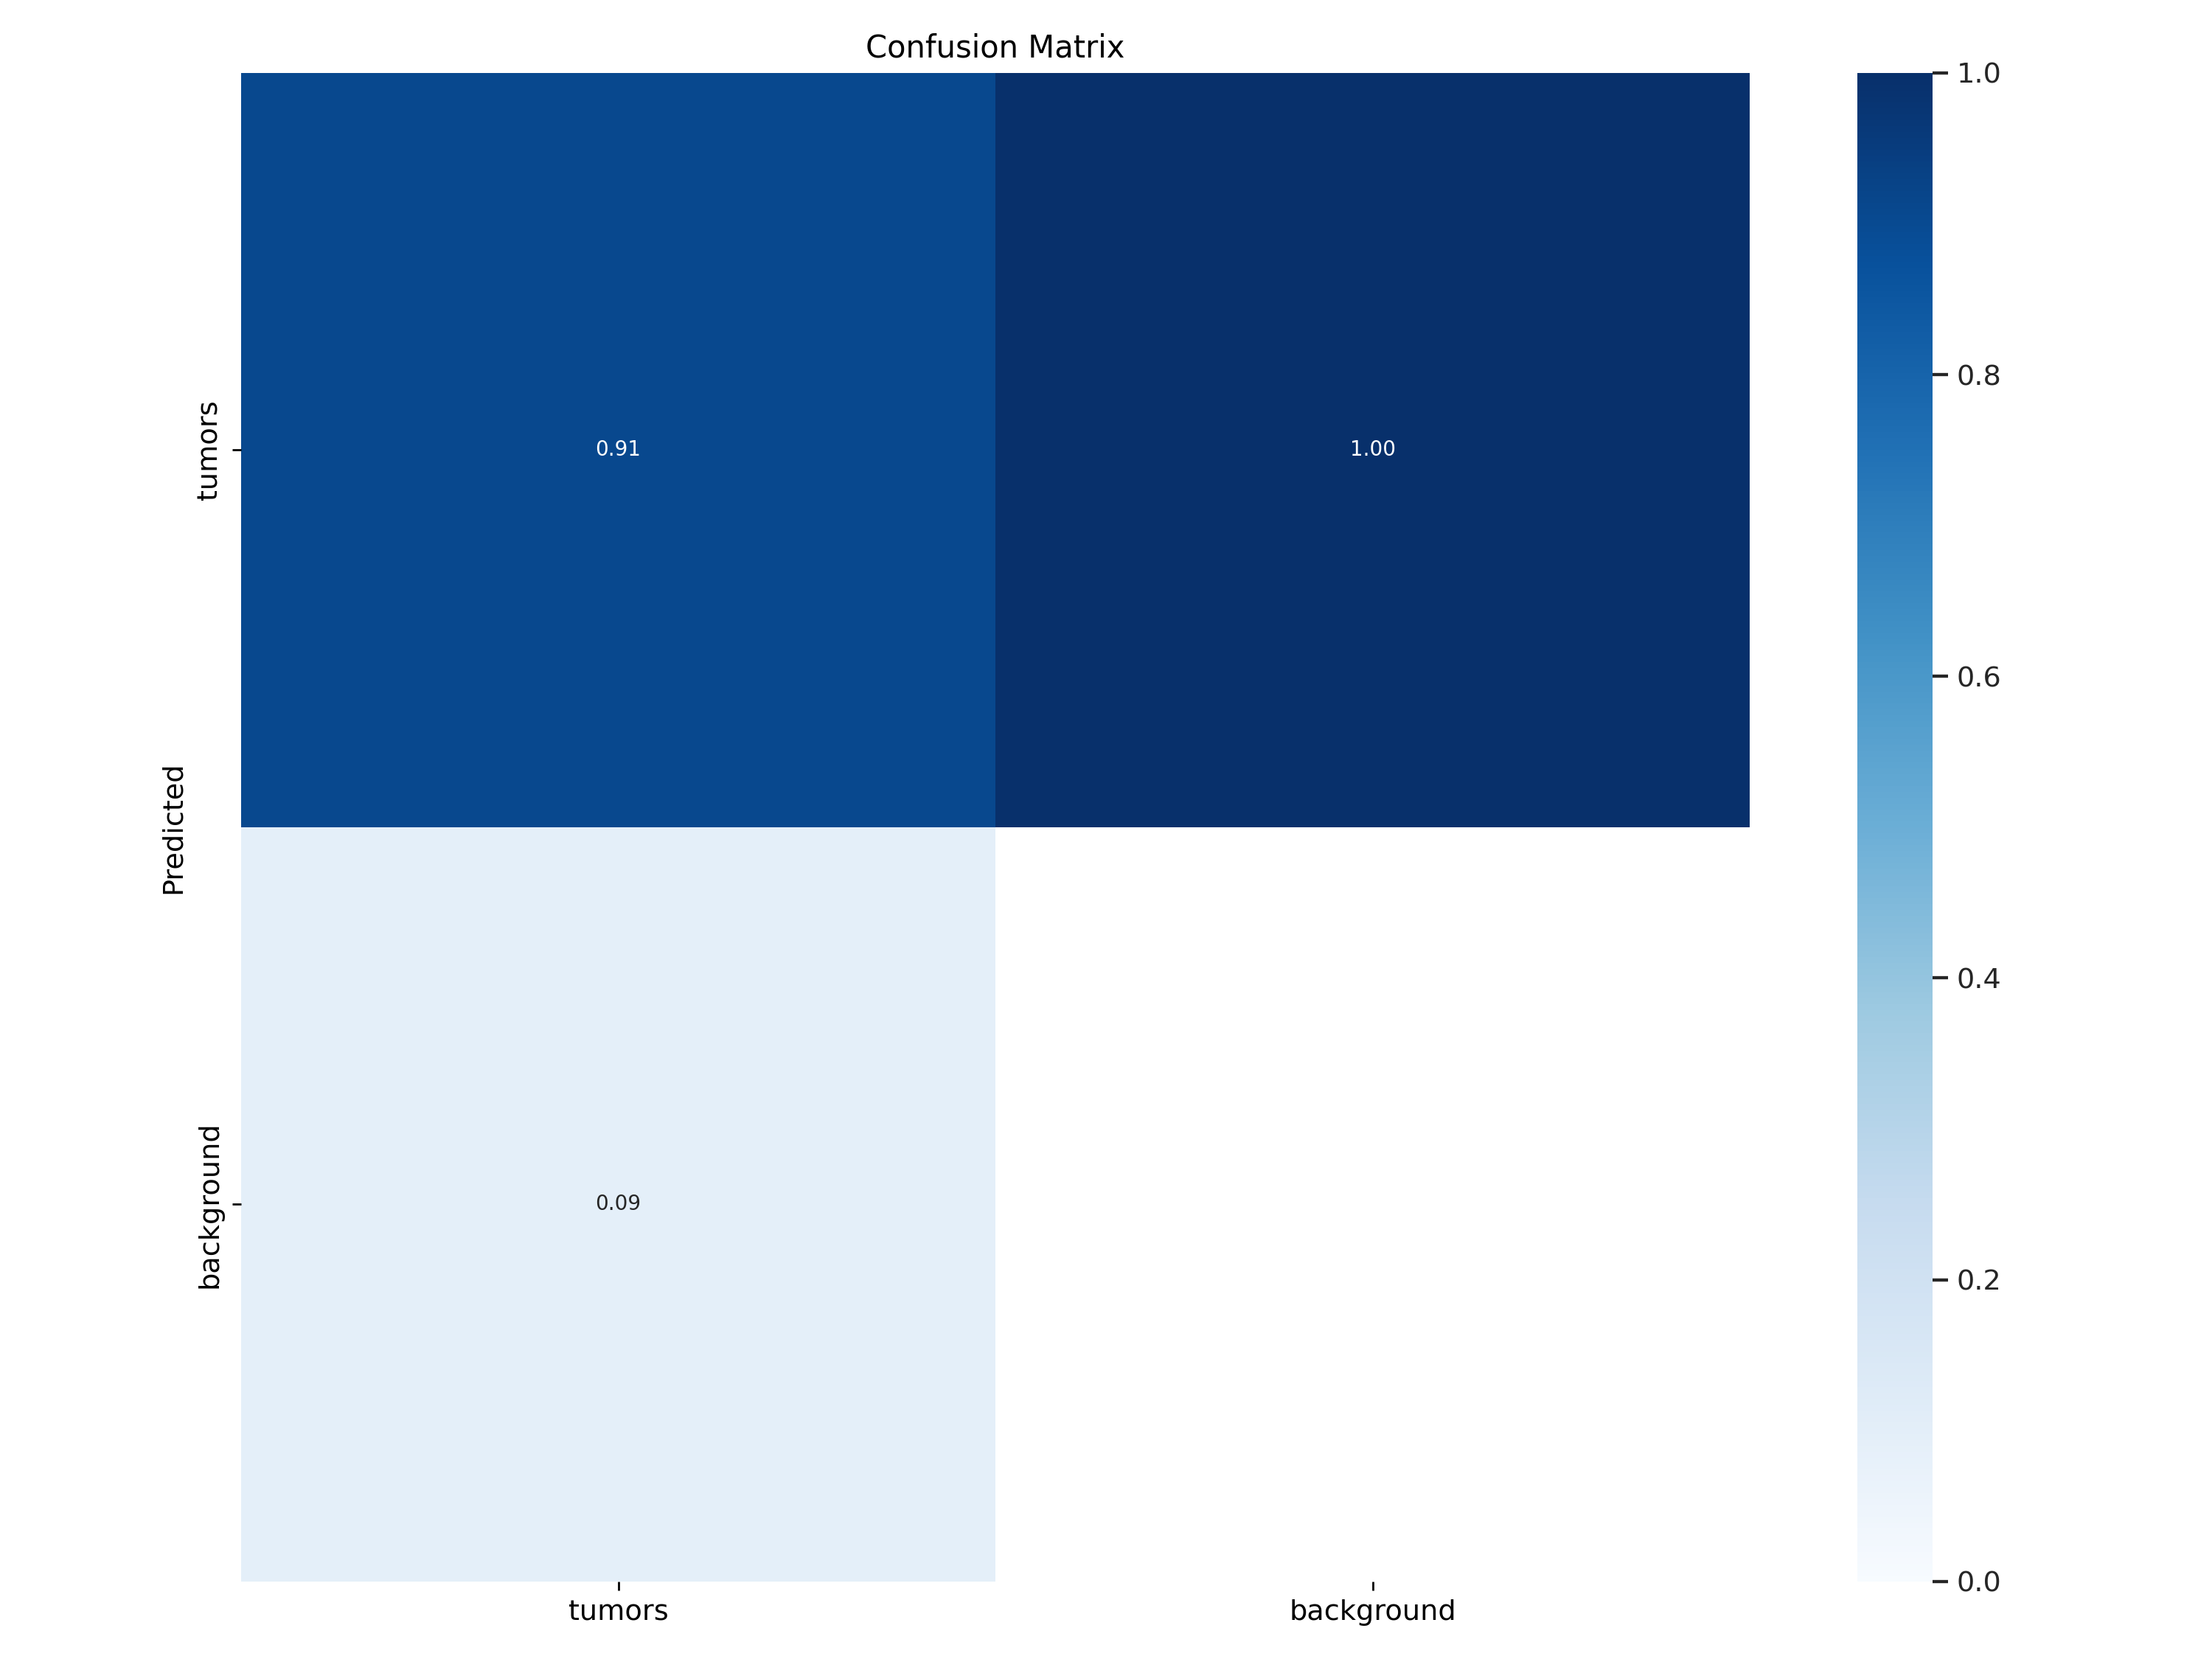

In [14]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

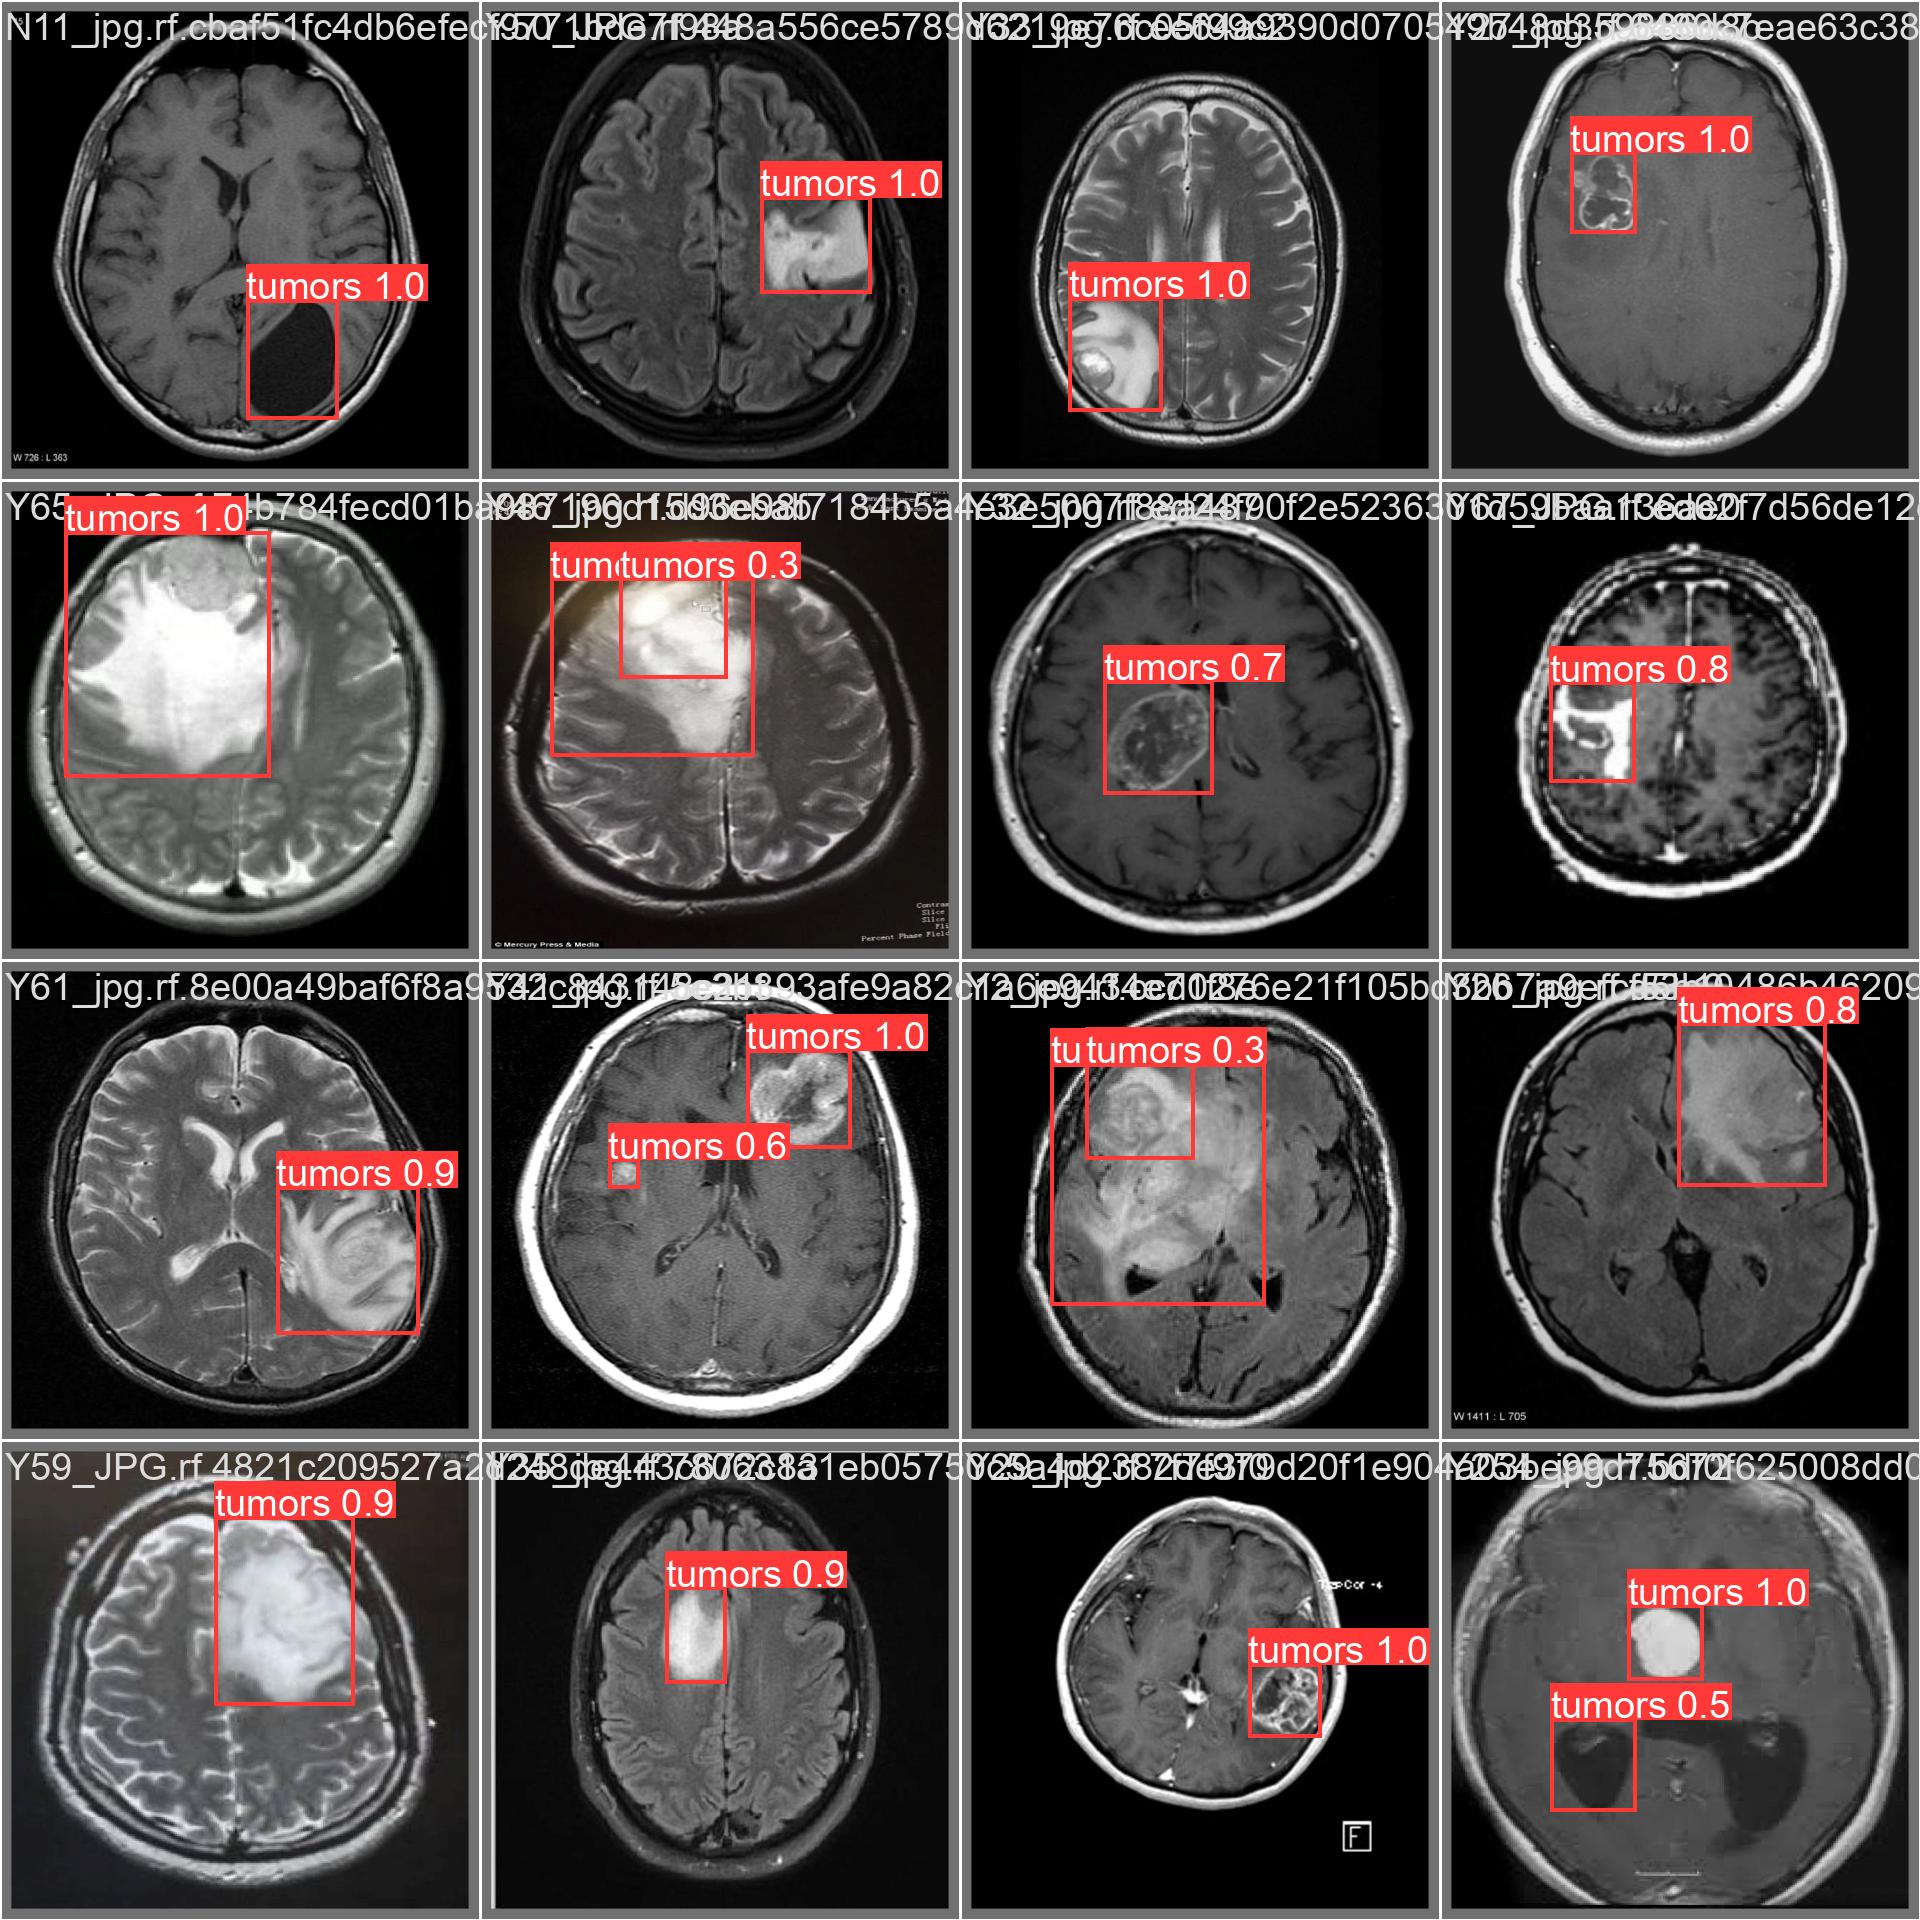

In [15]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

In [16]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/content/yolov9
val: data=/content/yolov9/brain-tumors-1/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/brain-tumors-1/valid/labels.cache... 29 images, 1 backgrounds, 0 corrupt: 100% 29/29 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:02<00:00,  2.56s/it]
                   all         29         32      0.901      0.853       0.87      0.699
Speed: 1.8ms pre-process, 35.8ms inference, 21.7ms NMS 

In [17]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    opt.yaml	  train_batch0.jpg
events.out.tfevents.1716944950.03e8d064cfed.1862.0  P_curve.png   train_batch1.jpg
F1_curve.png					    PR_curve.png  train_batch2.jpg
hyp.yaml					    R_curve.png   val_batch0_labels.jpg
labels_correlogram.jpg				    results.csv   val_batch0_pred.jpg
labels.jpg					    results.png   weights


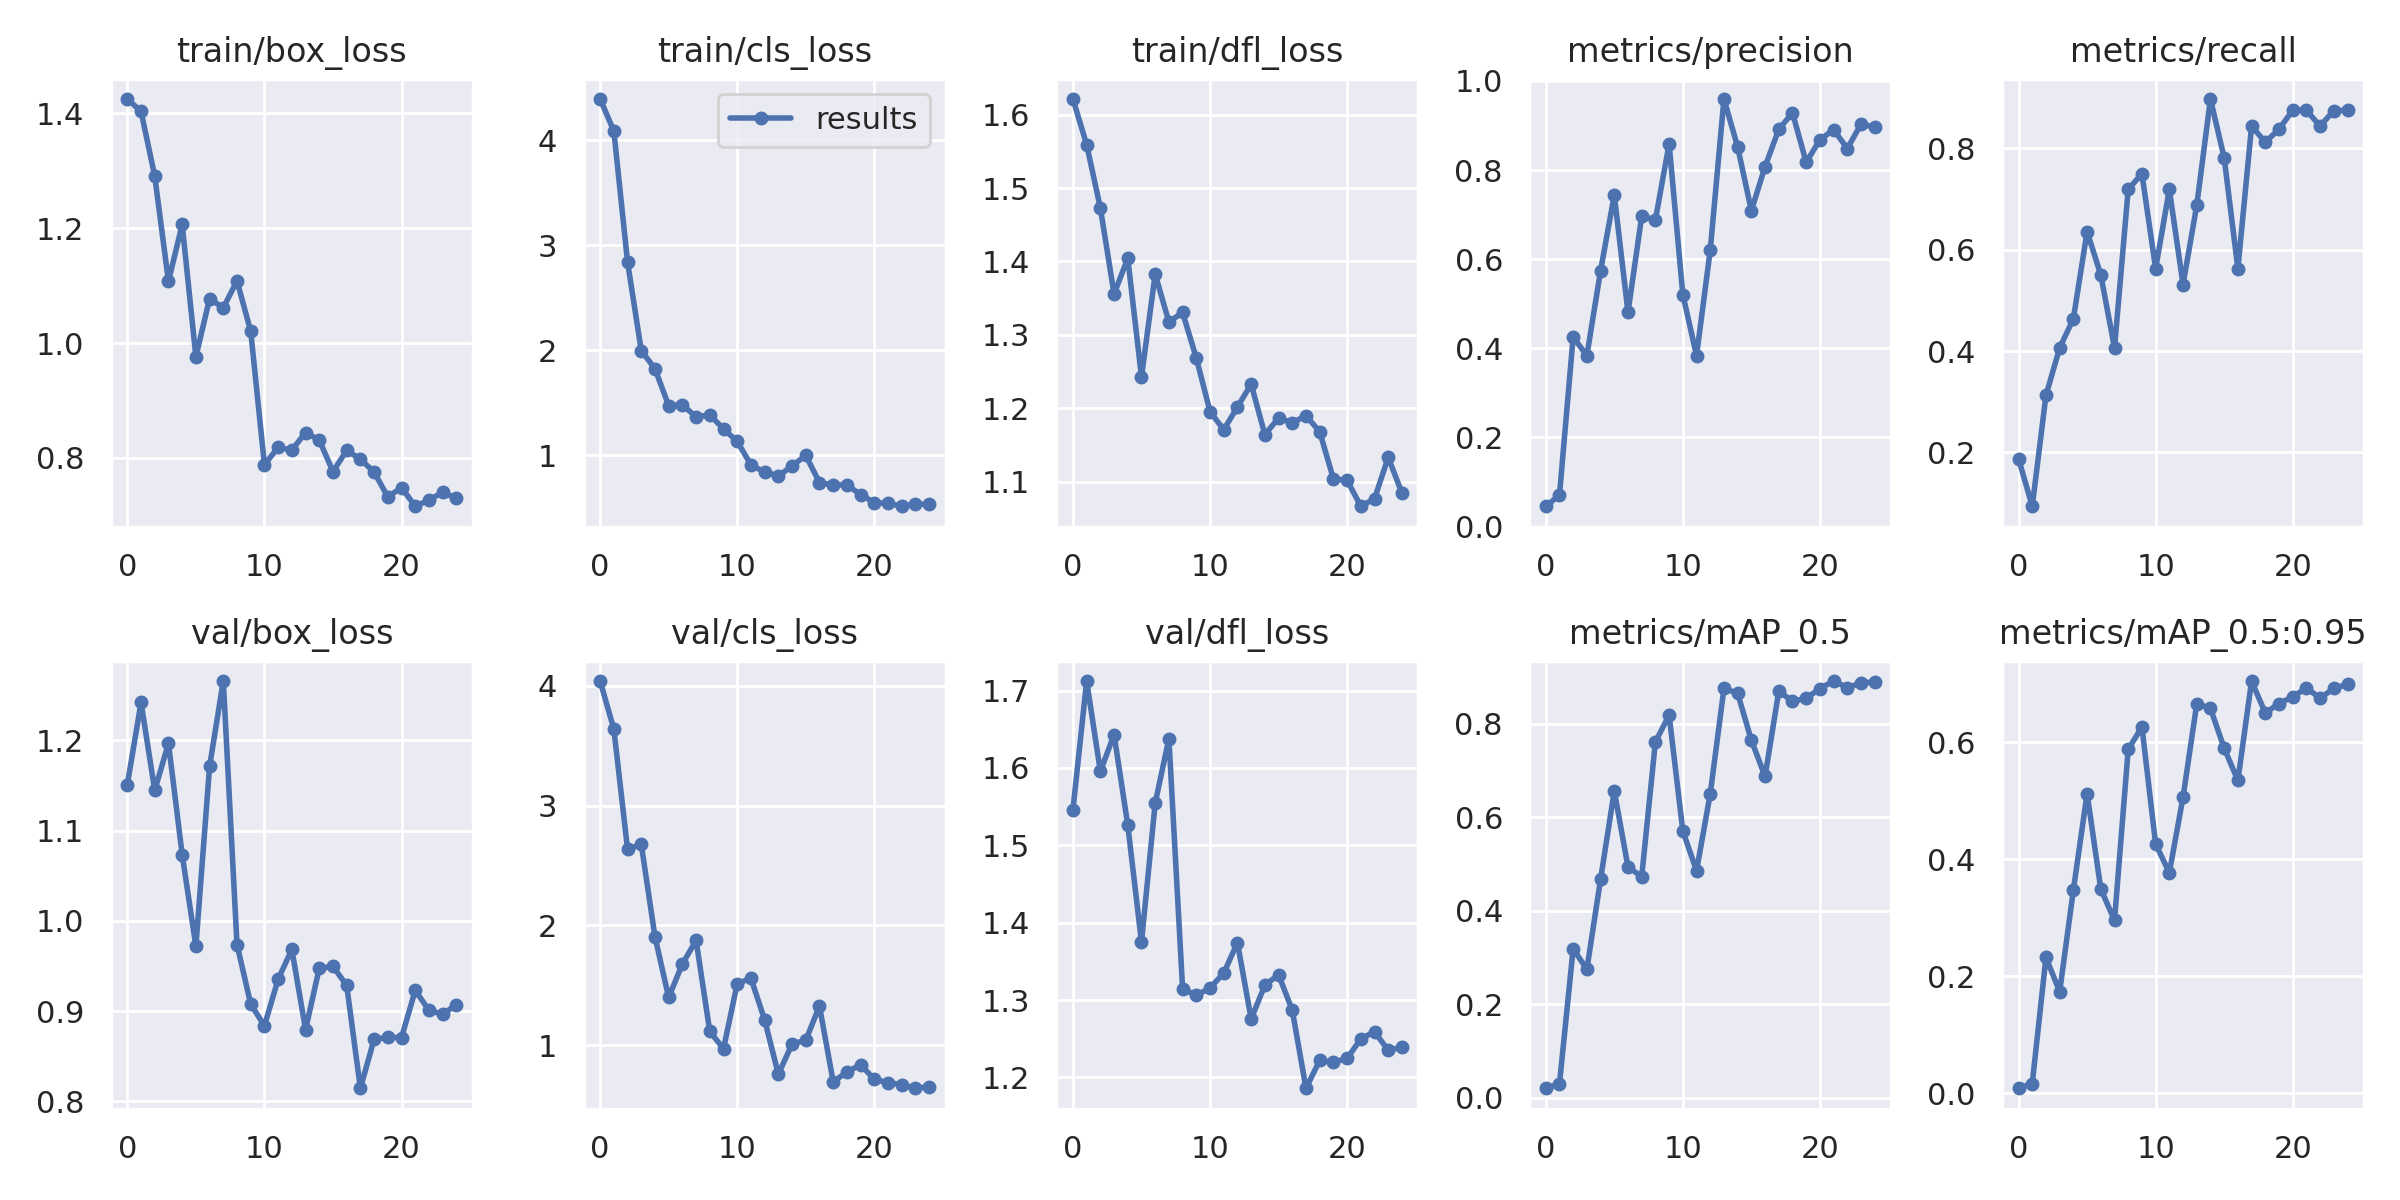

In [18]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

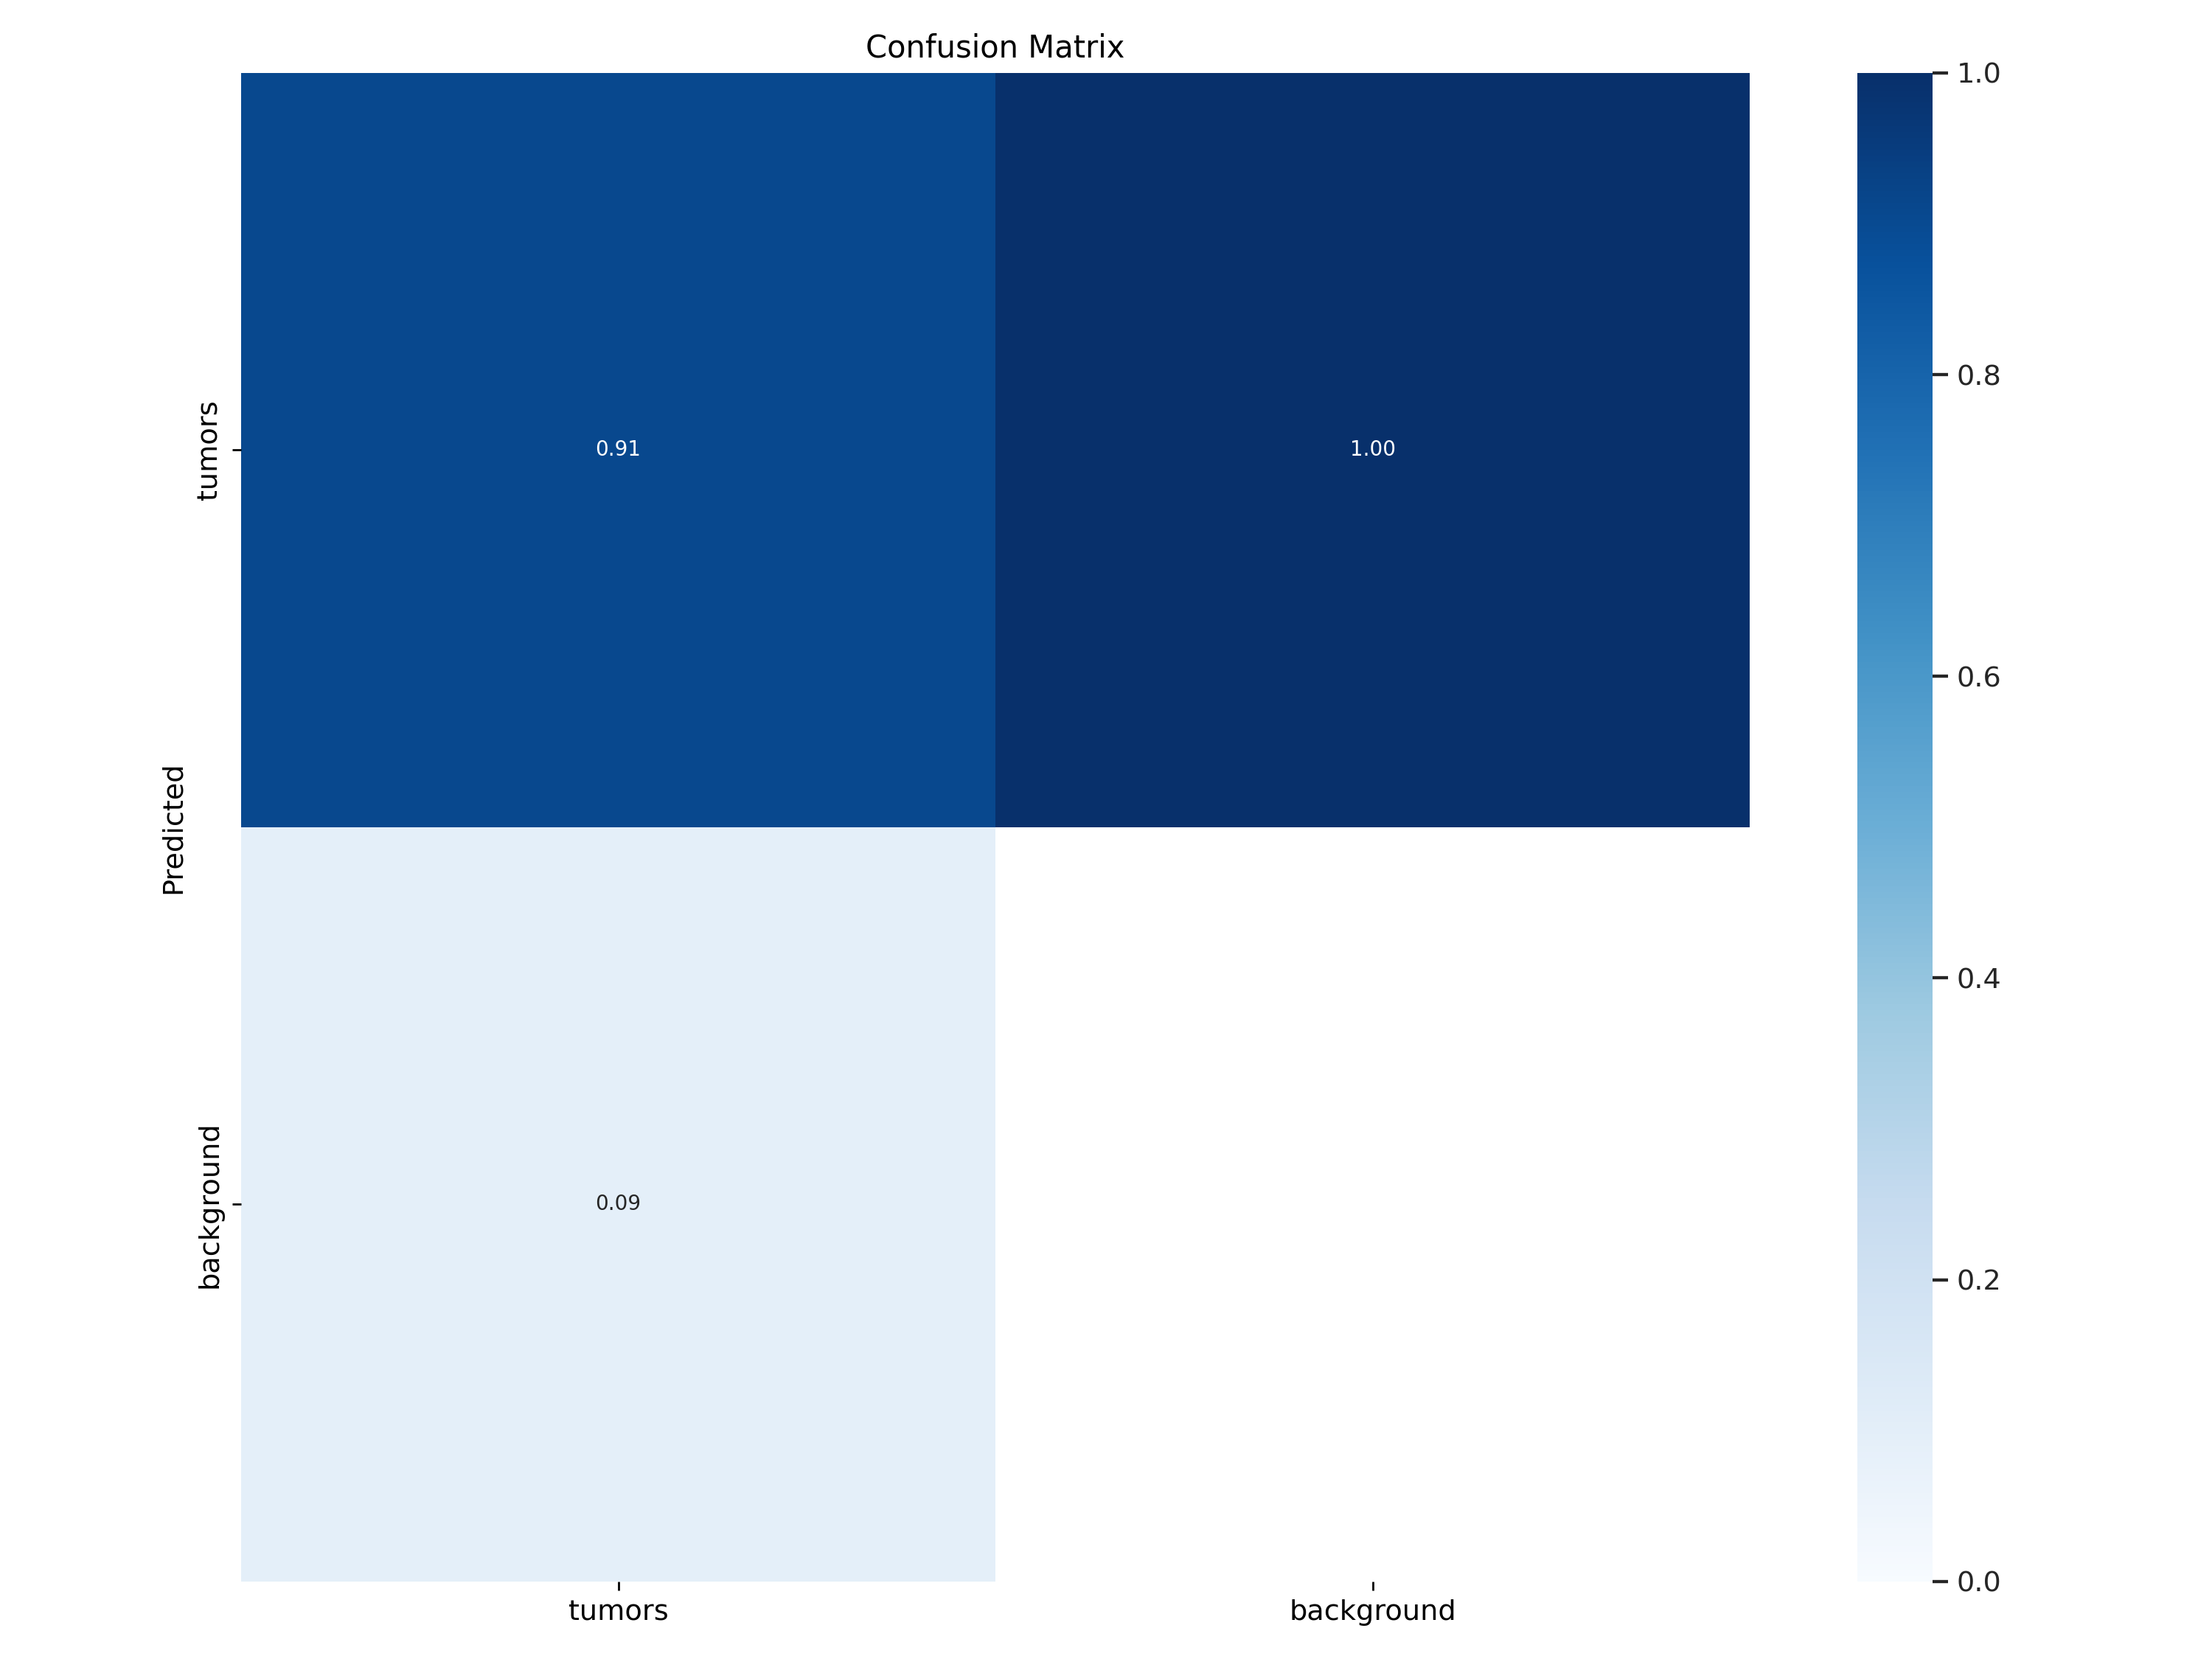

In [19]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

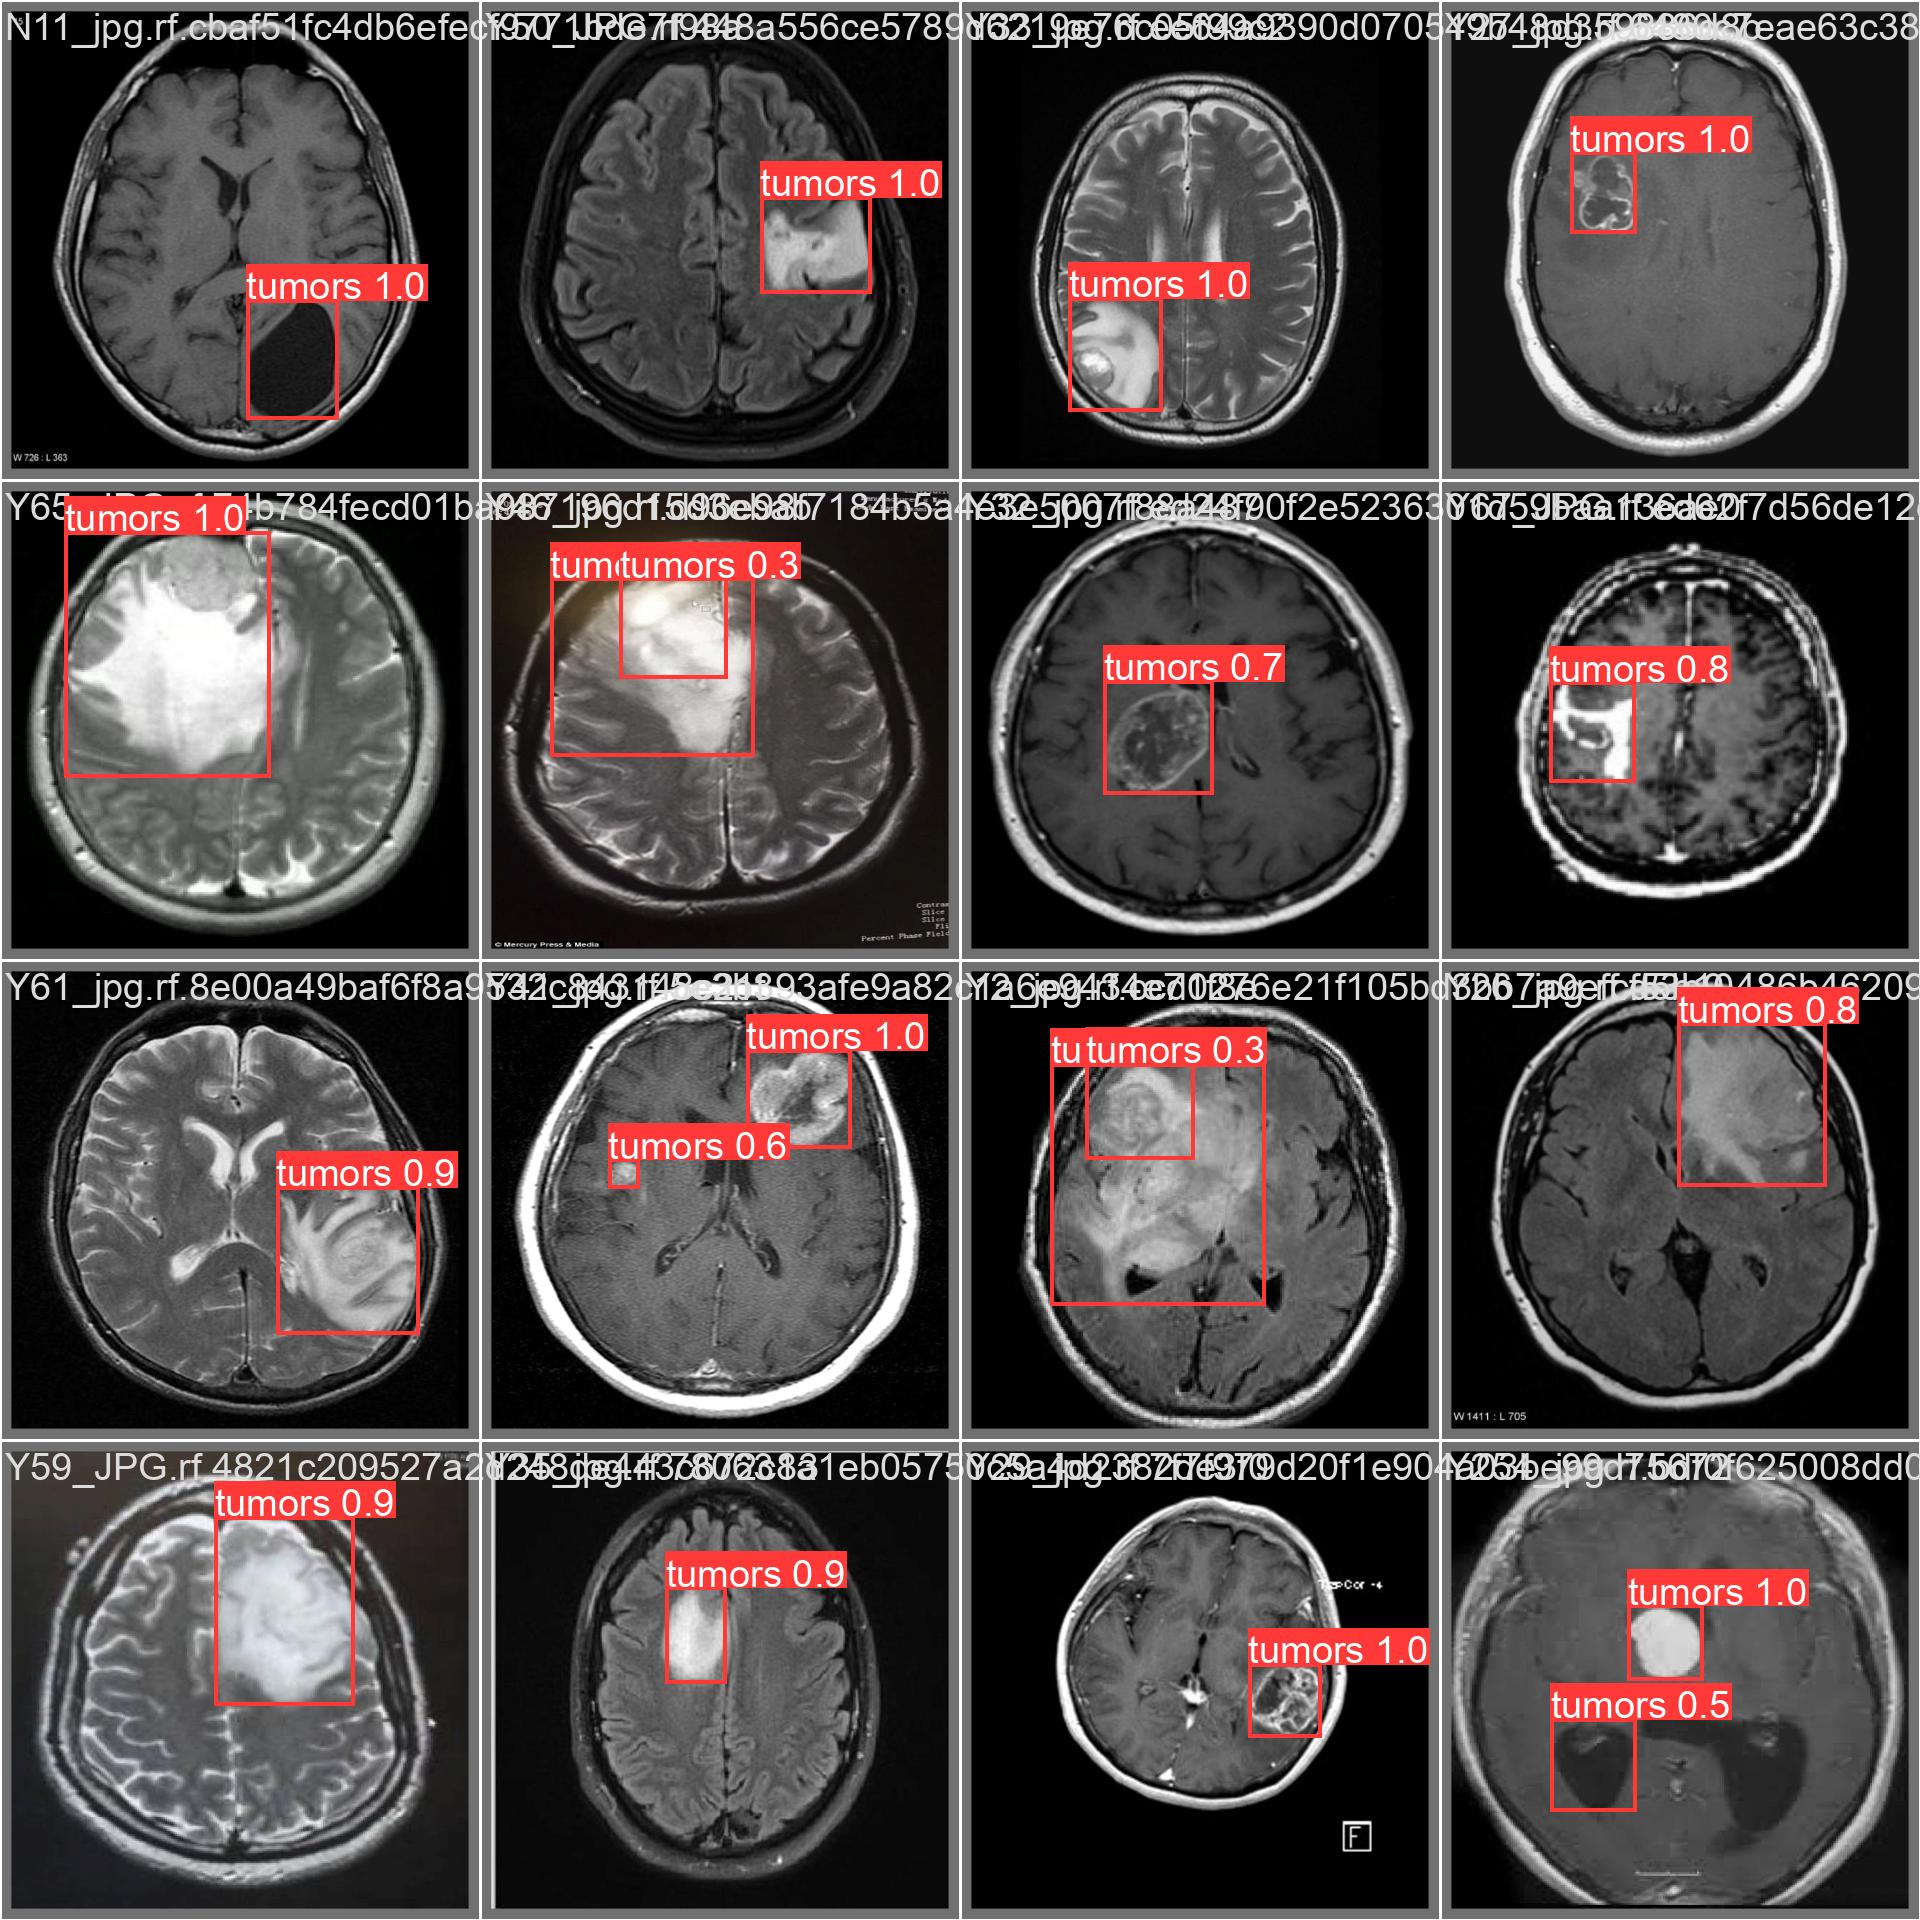

In [20]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

## Задание 2. Сформируйте свой датасет для детекции объектов и обучите на нем модель YOLOv9



Требования к датасету:

- Количество изображений в датасете: минимум 90
- Количество классов: более 2х
- Обязательно должны присутствовать изображения, содержащие несколько классов одновременно


*Примечание: Формирование датасета включает в себя поиск изображений и ручное аннотирование объектов на изображениях.*

In [21]:
# Импортируем библиотеку roboflow
import roboflow

# Входим в систему roboflow. Для этого вам потребуется ввести свои учетные данные.
roboflow.login()

# Создаем экземпляр класса Roboflow
rf = roboflow.Roboflow()

# Получаем доступ к проекту в рабочем пространстве.
# Здесь "alexandre-b2d69" - это имя рабочего пространства, а "first-ugfem" - имя проекта.

project = rf.workspace("neuralnet").project("naruto-qmh6d")

You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...


In [22]:
project.list_versions()

[{'id': 'neuralnet/naruto-qmh6d/1', 'name': '2024-05-29 4:02am', 'created': 1716944561.728, 'images': 90, 'splits': {'valid': 18, 'test': 9, 'train': 63}, 'preprocessing': {'auto-orient': True, 'resize': {'width': 640, 'format': 'Stretch to', 'height': 640}}, 'augmentation': {}, 'exports': []}]


In [23]:
version = project.version(1)

dataset = version.download("yolov9")

Exporting format yolov9 in progress : 85.0%
Version export complete for yolov9 format



Extracting Dataset Version Zip to Naruto-1 in yolov9:: 100%|██████████| 192/192 [00:00<00:00, 7037.42it/s]


In [24]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-05-29 01:13:49.428677: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 01:13:49.428733: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 01:13:49.430130: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-29 01:13:49.437685: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 01:13:50.937856: W tensorf

In [25]:
!ls {HOME}/yolov9/runs/train/exp2/

confusion_matrix.png				    opt.yaml	  train_batch0.jpg
events.out.tfevents.1716945232.03e8d064cfed.3376.0  P_curve.png   train_batch1.jpg
F1_curve.png					    PR_curve.png  train_batch2.jpg
hyp.yaml					    R_curve.png   val_batch0_labels.jpg
labels_correlogram.jpg				    results.csv   val_batch0_pred.jpg
labels.jpg					    results.png   weights


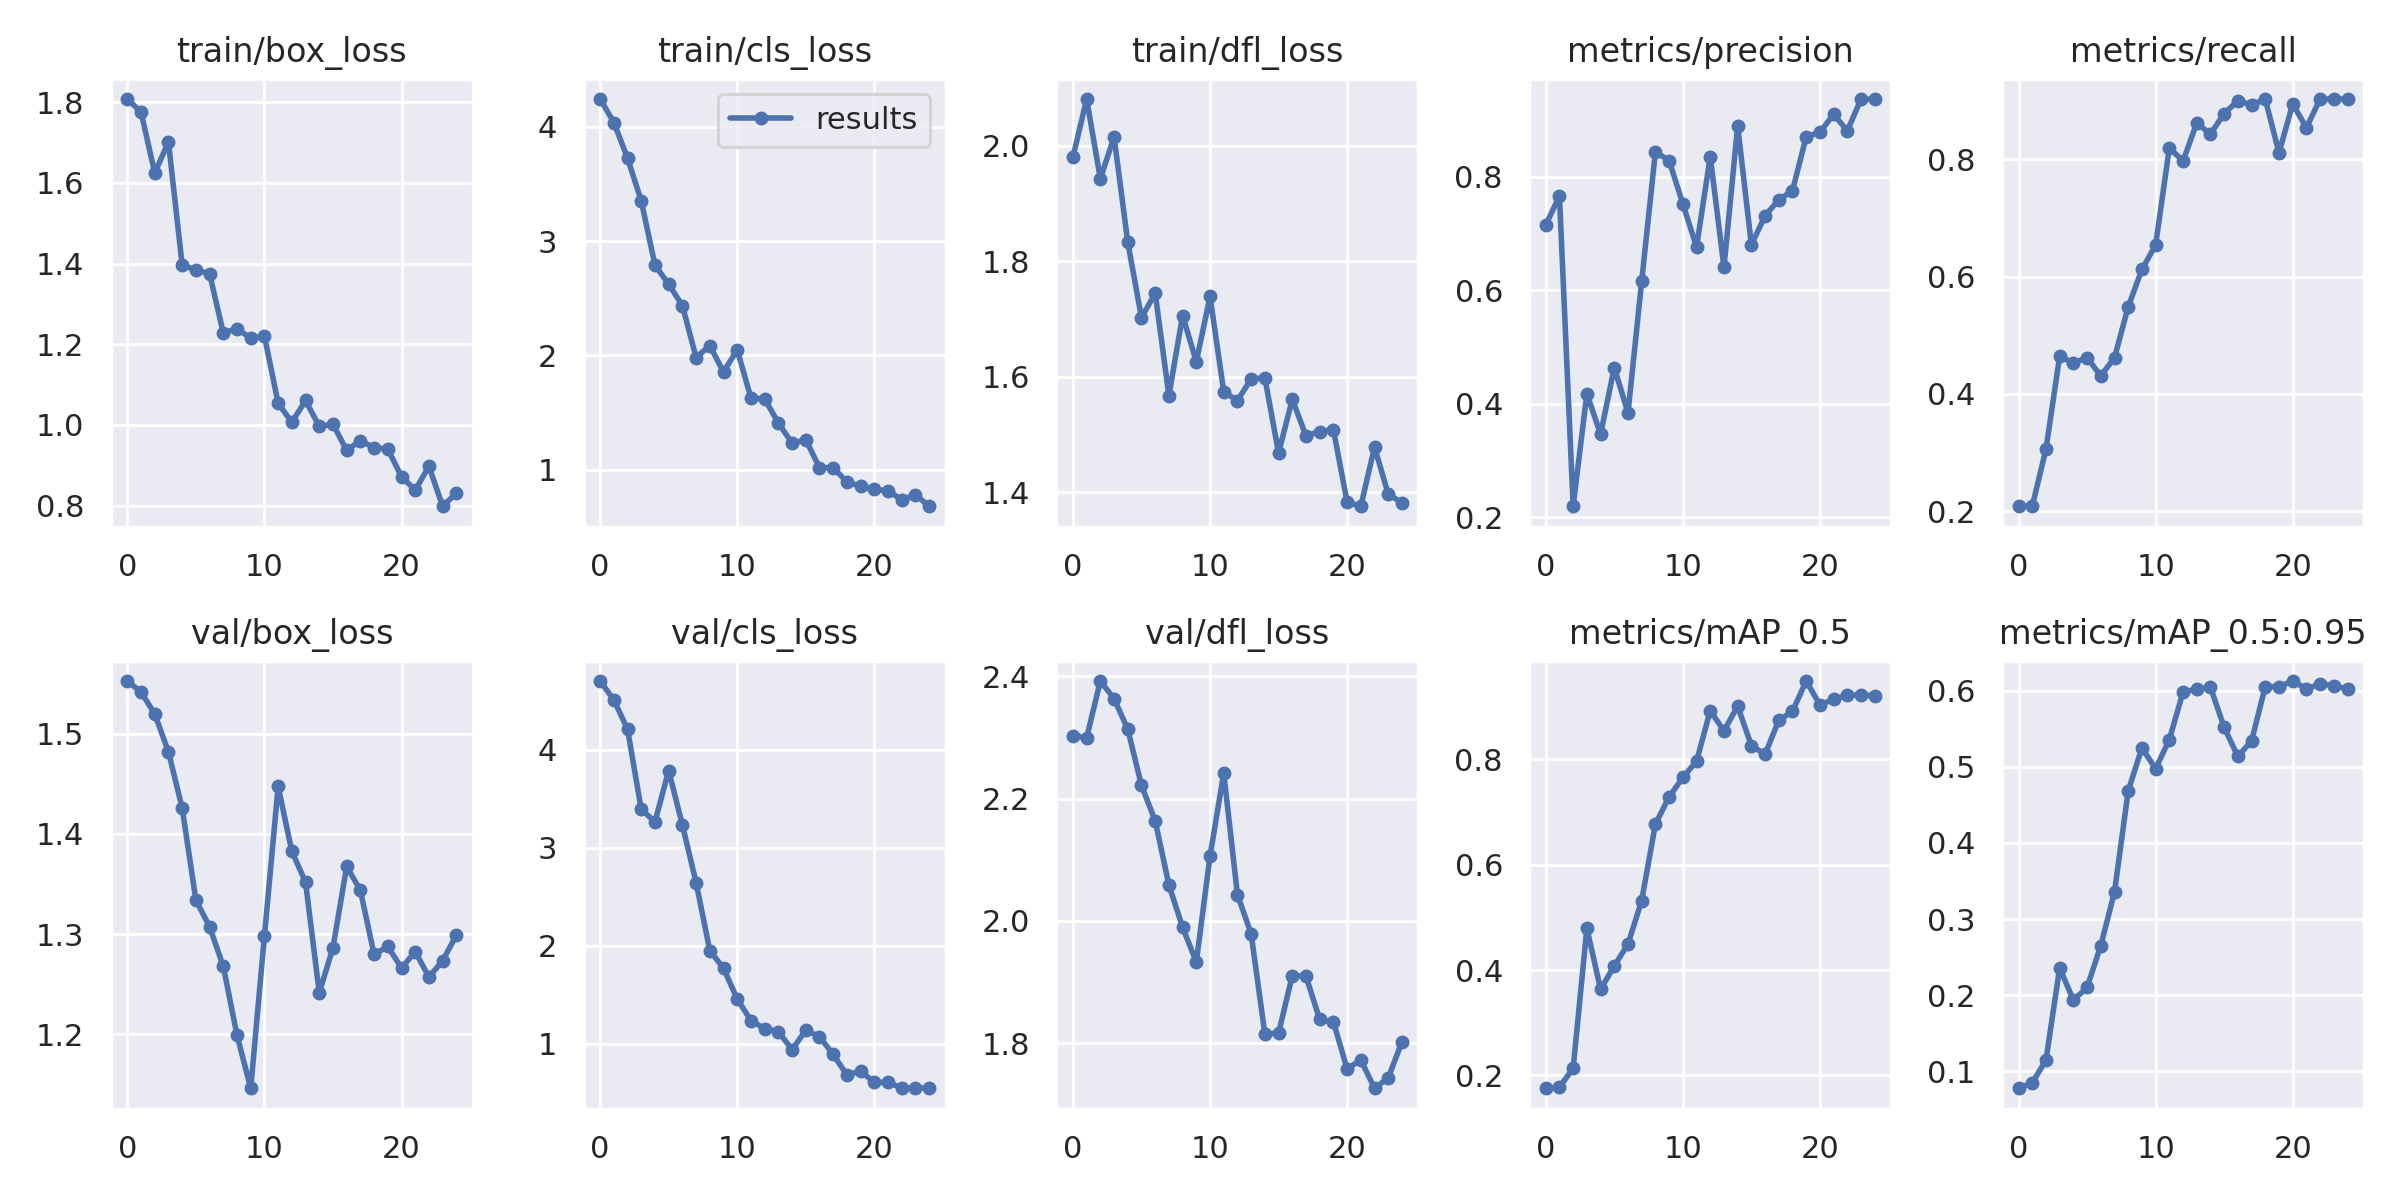

In [26]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp2/results.png", width=1000)

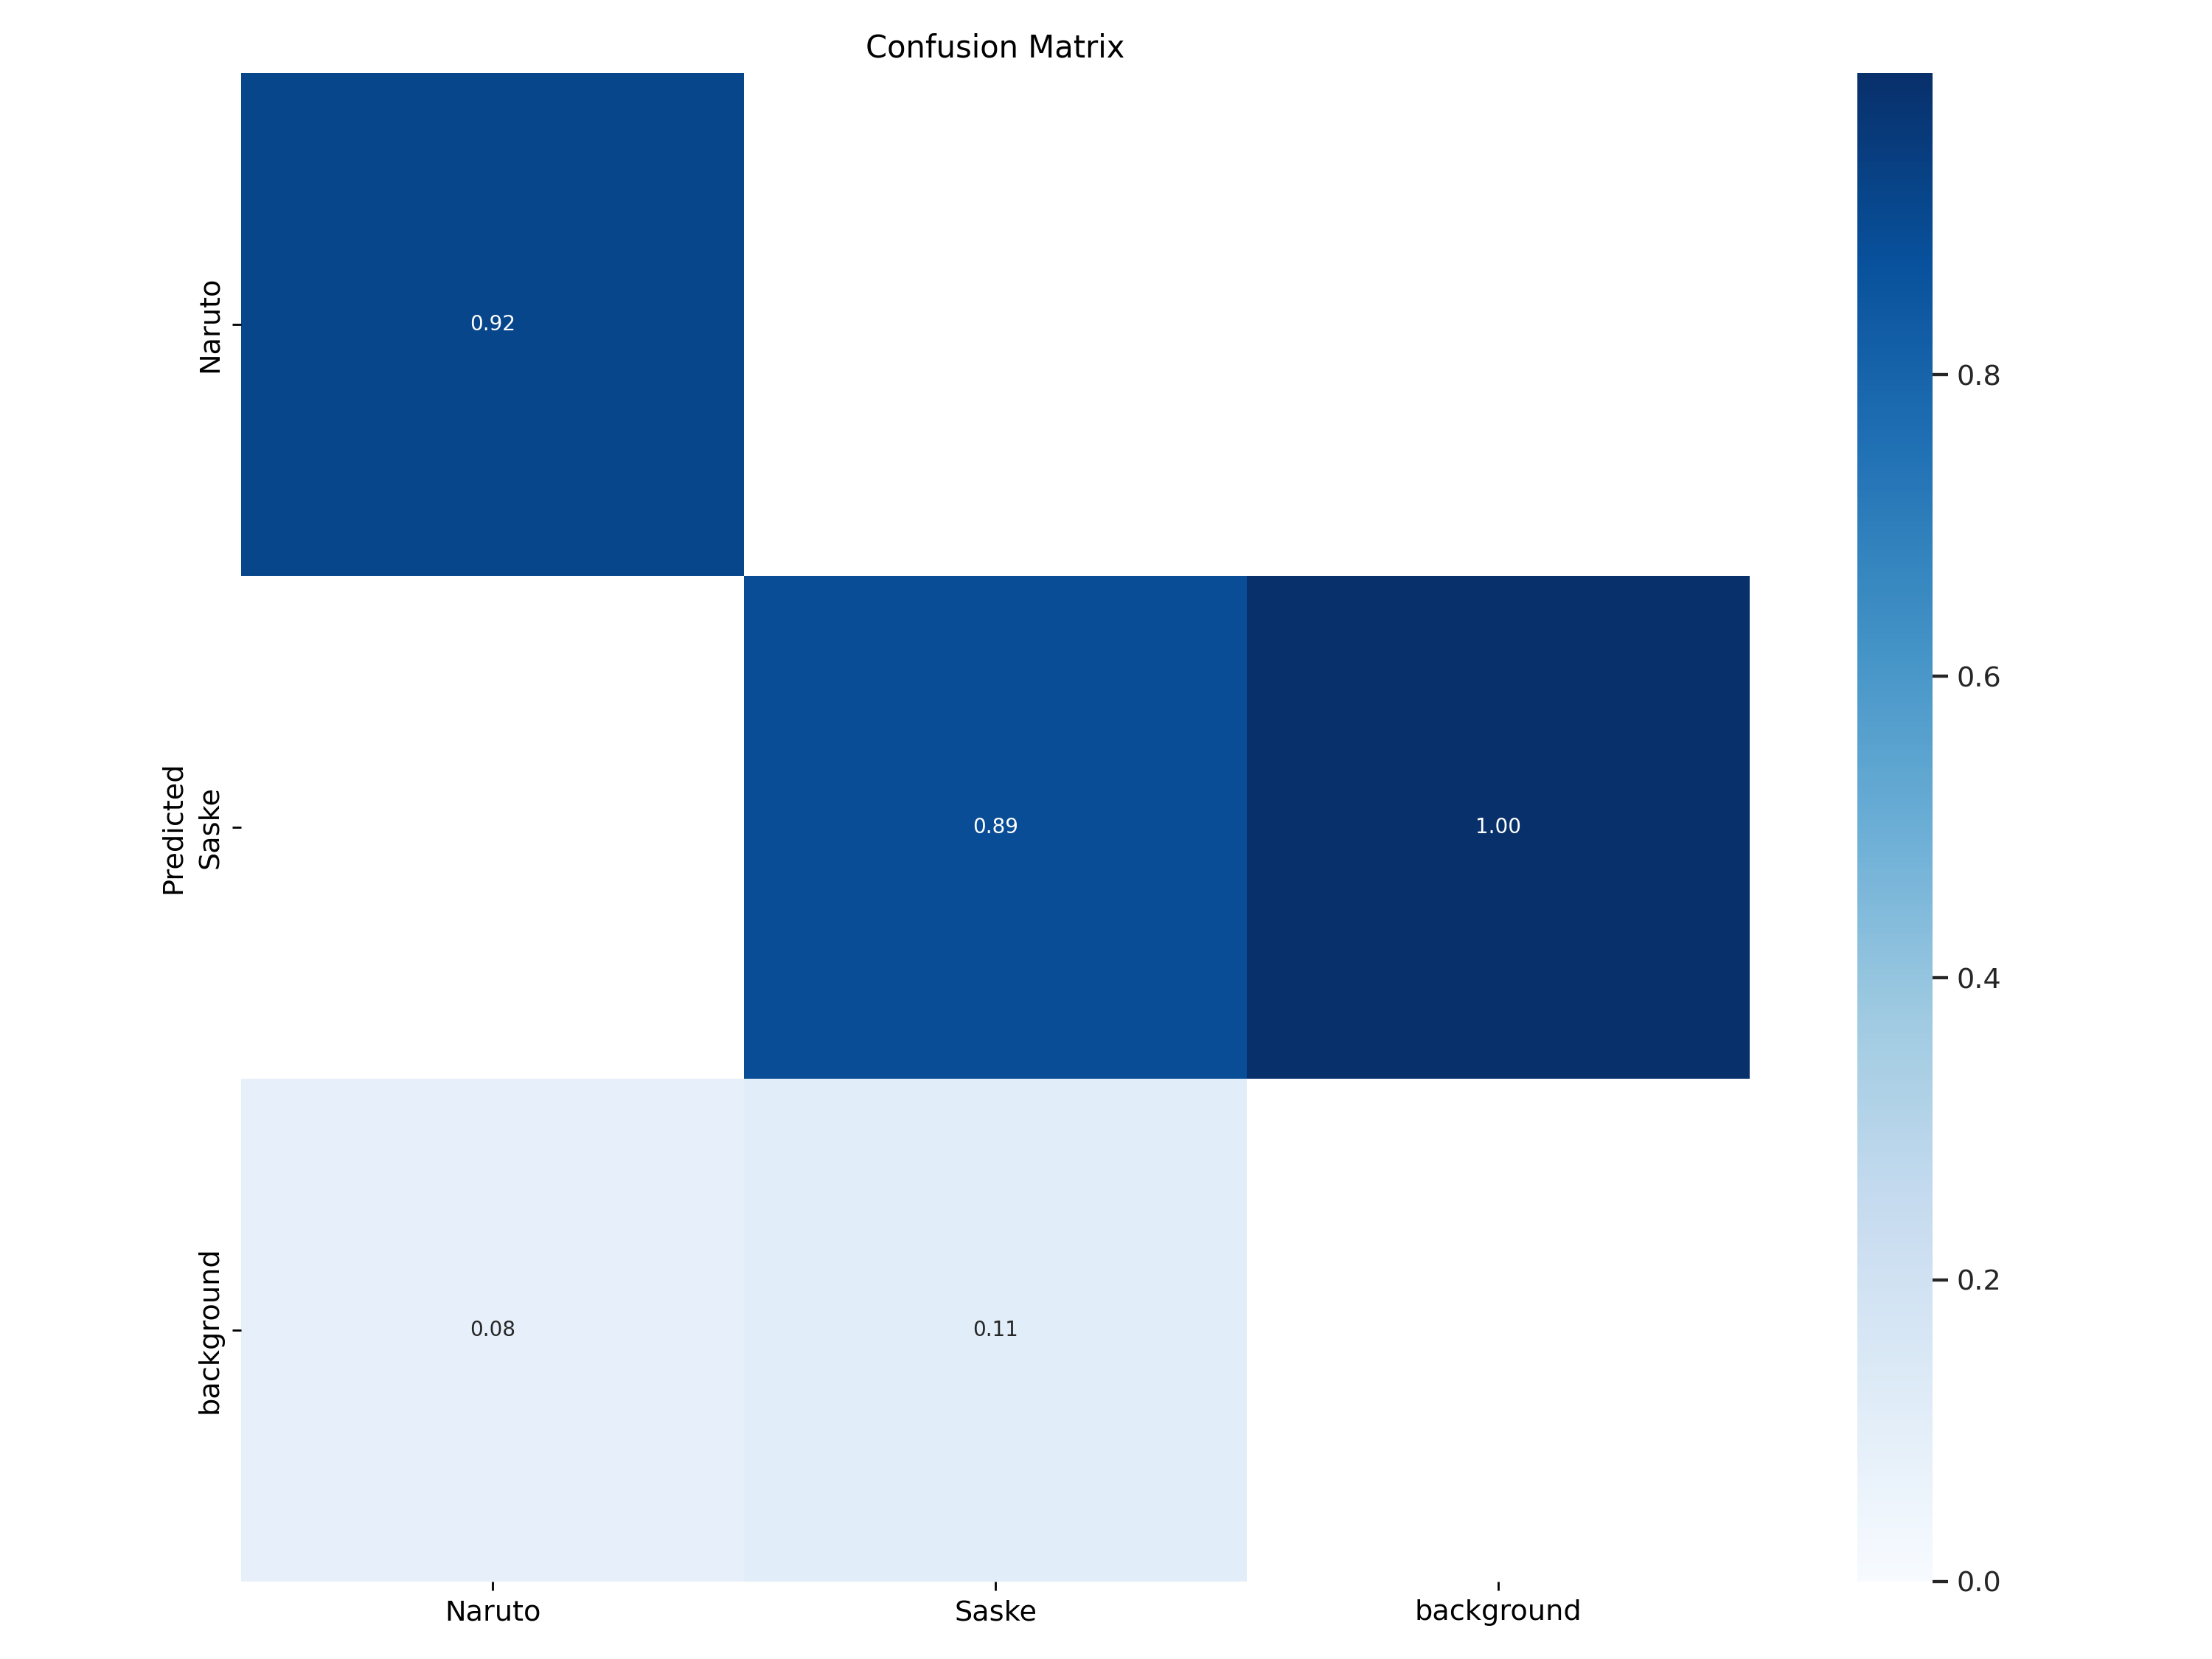

In [27]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp2/confusion_matrix.png", width=1000)

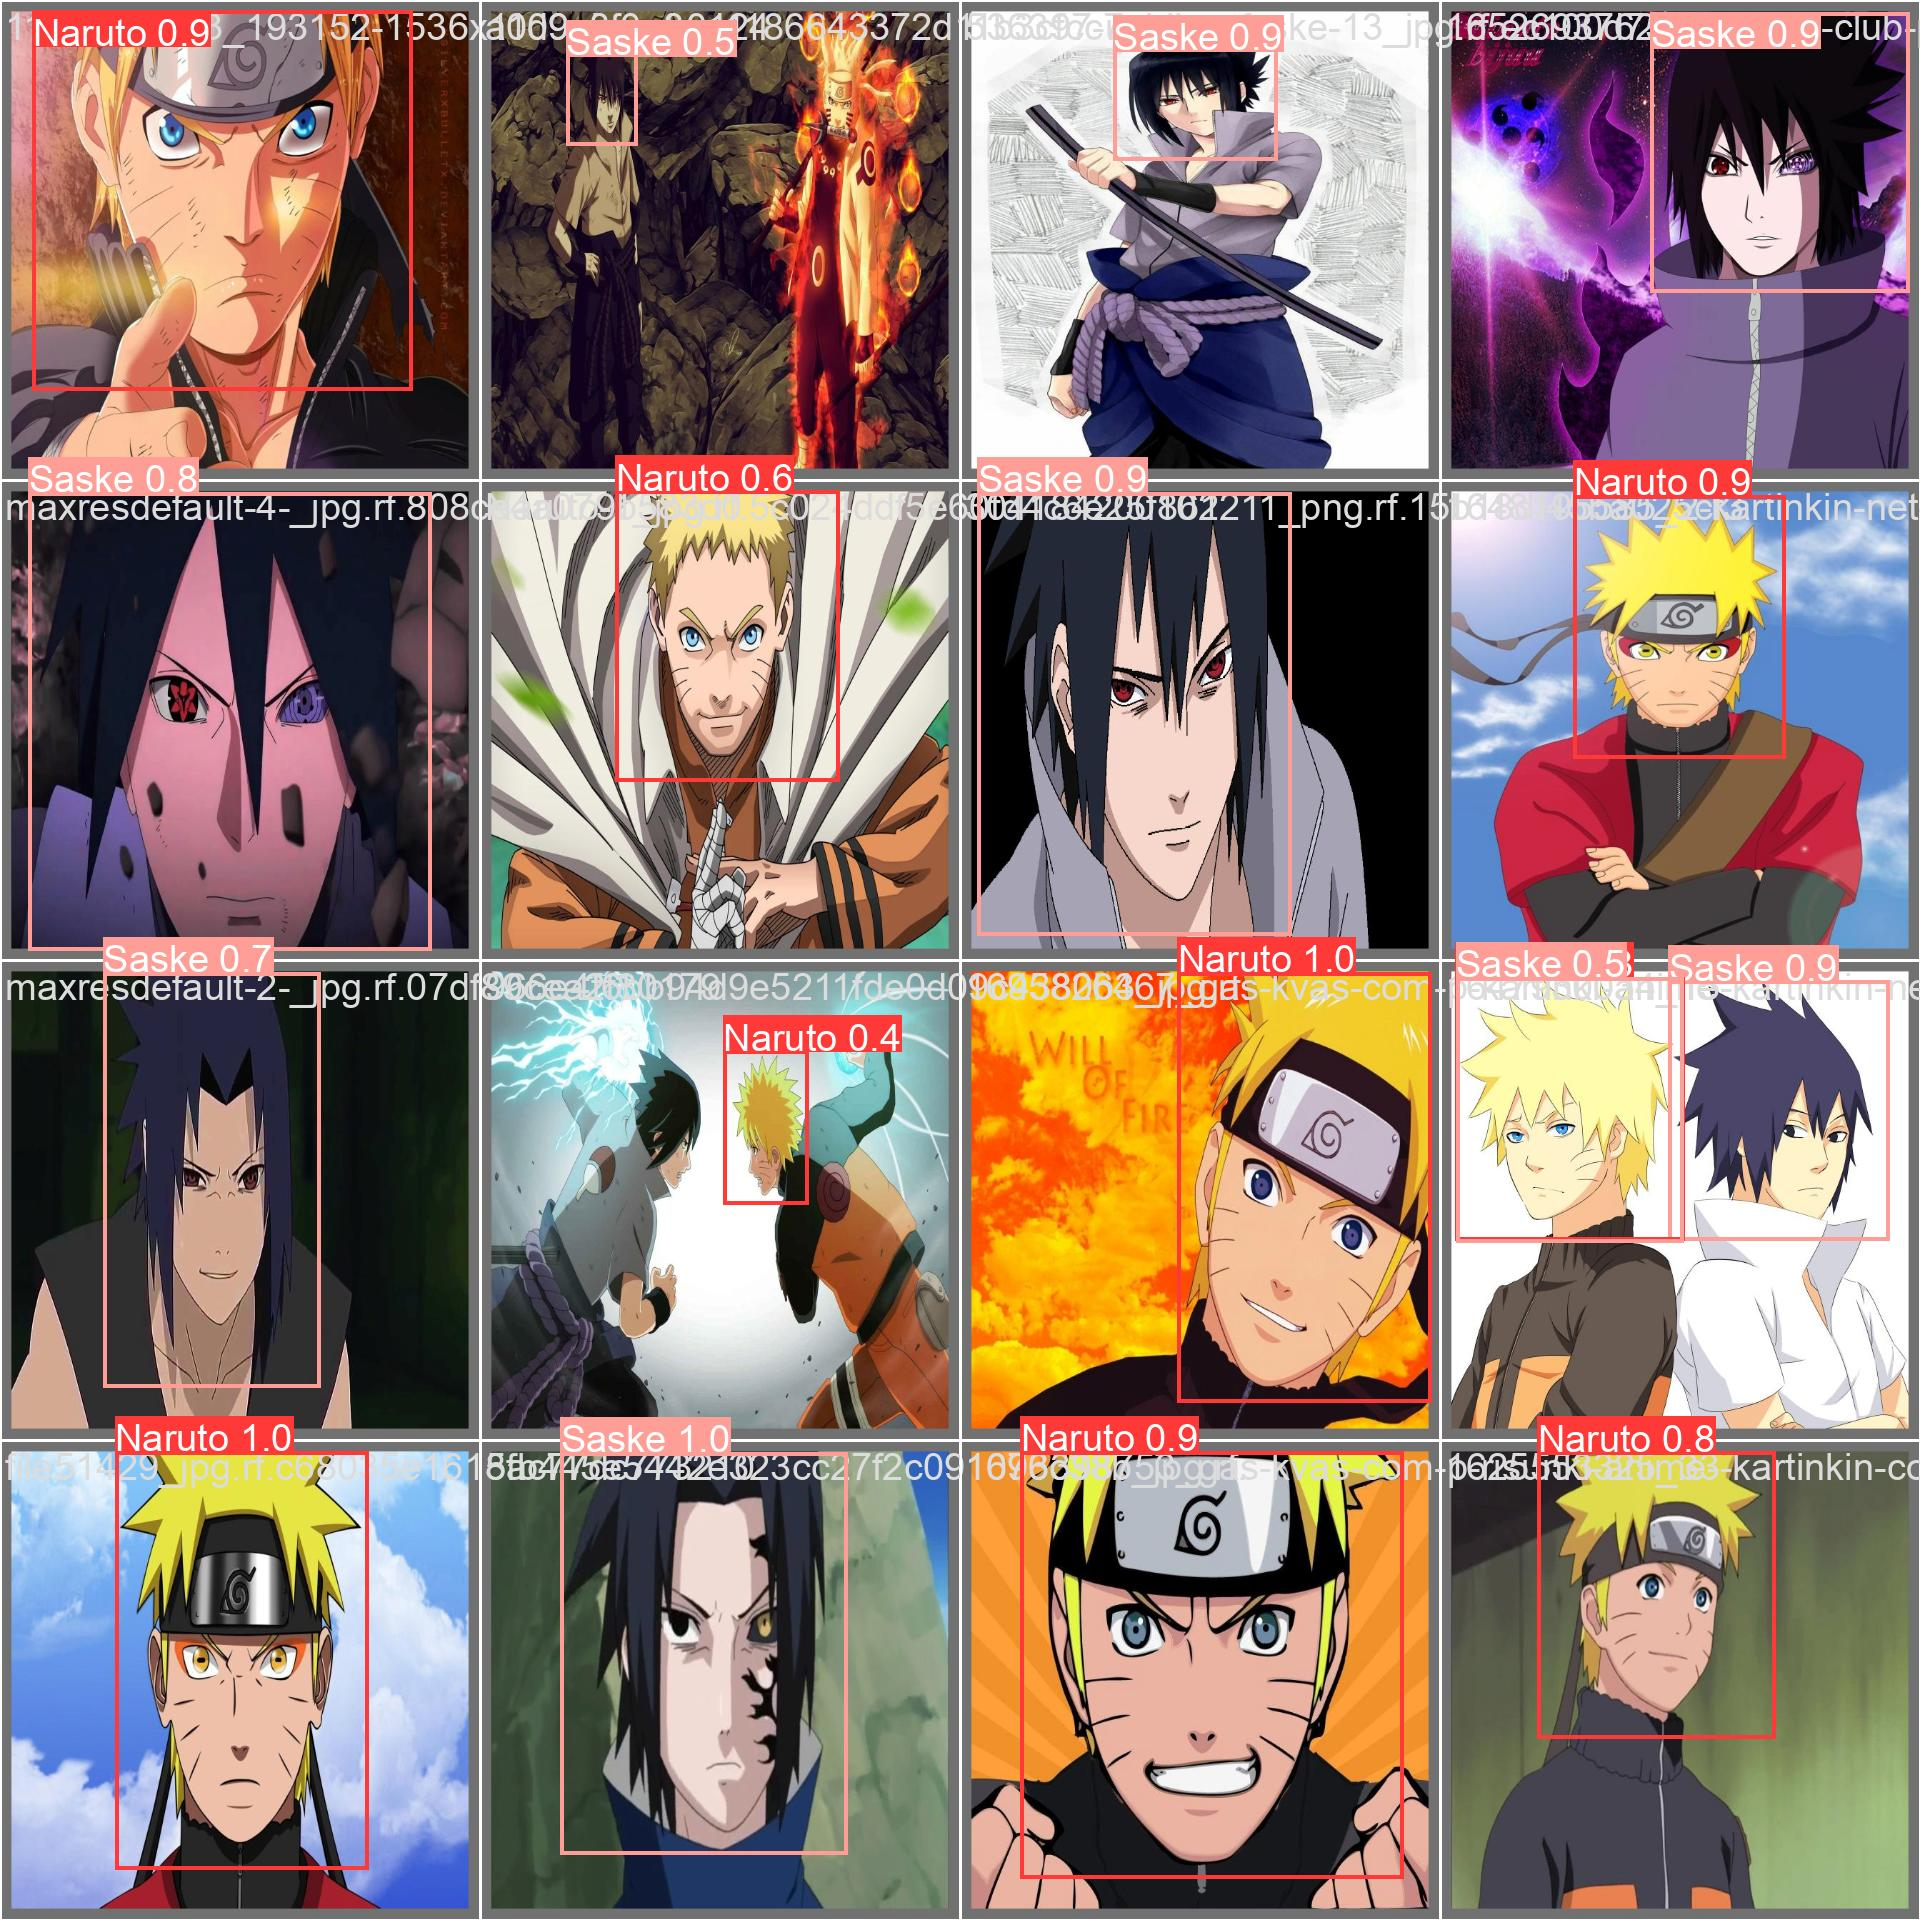

In [28]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp2/val_batch0_pred.jpg", width=1000)

## Задание 3 (для магистрантов). Обучите модель на датасете [RSD-GOD](https://github.com/Dr-Zhuang/geospatial-object-detection). Затем самостоятельно сформируйте тестовые данные (не менее 50 изображений с аннотациями) и оцените качество обученной модели:



**Прямая ссылка на загрузку датасета: [загрузить](https://drive.google.com/open?id=1ttvSta0BRxW7tTV_st89vSb_obHVre34)**

 *Примечание: для поиска данных удобно использовать сервис Google Earth/Google Earth Engine*

In [ ]:
# Импортируем библиотеку roboflow
import roboflow

# Входим в систему roboflow. Для этого вам потребуется ввести свои учетные данные.
roboflow.login()

# Создаем экземпляр класса Roboflow
rf = roboflow.Roboflow()

project = rf.workspace("neuralnet").project("rsd-god-aio3e")

You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...
